In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.ticker as ticker

import warnings
warnings.filterwarnings('ignore')

In [7]:
color = (0/255, 121/255, 194/255)

In [8]:
df_comp = pd.read_csv("/content/drive/MyDrive/Курс Анализ данных/Практика/data/companies_data.csv", index_col=0)
df_own = pd.read_csv("/content/drive/MyDrive/Курс Анализ данных/Практика/data/owners_data.csv", index_col=0)
df_shr = pd.read_csv("/content/drive/MyDrive/Курс Анализ данных/Практика/data/shares_data.csv", index_col=0)
df_rep = pd.read_csv("/content/drive/MyDrive/Курс Анализ данных/Практика/data/reports_data.csv", index_col=0)

In [10]:
df_comp[df_comp.code == "GAZP"]

,code,name,country,sector,industry_group,industry
3,GAZP,ГАЗПРОМ,Россия,Энергетика,Энергетика,"Добыча нефти, газа и потребляемого топлива"


In [11]:
df_own_gazp = df_own[df_own.code == "GAZP"].copy()
df_own_gazp

,code,own,owner,year
16,GAZP,43.1,Прочие,2023
17,GAZP,38.4,РФ в лице Федерального агентства по управлению...,2023
18,GAZP,11.0,АО «РОСНЕФТЕГАЗ»,2023
19,GAZP,6.6,Держатели АДР,2023
20,GAZP,0.9,АО «Росгазификация»,2023


In [12]:
df_shr_gazp = df_shr[df_shr.code == "GAZP"].copy()
df_shr_gazp.head()

,code,exchange,month,num,price,year
450,GAZP,MOEX,12,23673512900,171.33,2011
451,GAZP,MOEX,3,23673512900,180.75,2012
452,GAZP,MOEX,6,23673512900,153.43,2012
453,GAZP,MOEX,9,23673512900,157.86,2012
454,GAZP,MOEX,12,23673512900,144.32,2012


In [13]:
df_rep_gazp = df_rep[df_rep.code == "GAZP"].copy()
df_rep_gazp.dropna(axis = 1, how = 'all', inplace = True)
df_rep_gazp.sample(10)

,accounts_payable,accounts_payable_current,accounts_payable_long,accounts_receivable,accounts_receivable_current,accounts_receivable_long,amount,capex,cash_and_equiv,cash_paid_for_interest,...,preliminary,property_plant_equipment,retained_earnings,revenue,total_assets,total_debt,total_expenses,total_liabilities,type,year
340,1711639.0,NaN,1711639.0,3079309.0,1946428.0,1132881.0,1000000,NaN,1157587.0,NaN,...,ЛОЖЬ,17419060.0,15126010.0,4682867.0,26128929.0,5065861.0,NaN,9683084.0,МСФО,2022
334,NaN,NaN,NaN,NaN,NaN,NaN,1000000,1293894.0,1307630.0,NaN,...,ЛОЖЬ,NaN,NaN,6725132.0,26012278.0,4792201.0,NaN,9672104.0,МСФО,2021
328,NaN,NaN,NaN,NaN,NaN,NaN,1000000,802369.0,1034919.0,NaN,...,ЛОЖЬ,NaN,NaN,3418411.0,23352185.0,4907614.0,NaN,8547453.0,МСФО,2020
343,2507794.0,2507794.0,NaN,2863582.0,1261693.0,1601889.0,1000000,NaN,1426780.0,NaN,...,ЛОЖЬ,18436207.0,14591946.0,4427538.0,28713748.0,6657480.0,NaN,12261034.0,МСФО,2023
326,NaN,NaN,NaN,NaN,NaN,NaN,1000000,1089456.0,498740.0,NaN,...,ЛОЖЬ,NaN,NaN,4301218.0,22460133.0,4962536.0,NaN,8122587.0,МСФО,2020
321,NaN,NaN,NaN,NaN,NaN,NaN,1000000,551188.0,696057.0,NaN,...,ЛОЖЬ,NaN,NaN,1961284.0,21882348.0,3863904.0,NaN,7266661.0,МСФО,2019
332,NaN,NaN,NaN,NaN,NaN,NaN,1000000,831440.0,1411790.0,NaN,...,ЛОЖЬ,NaN,NaN,4351968.0,24624250.0,4807503.0,NaN,8991477.0,МСФО,2021
311,NaN,NaN,NaN,NaN,NaN,NaN,1000000,400467.0,885721.0,NaN,...,ЛОЖЬ,NaN,NaN,1930036.0,19935162.0,3512327.0,NaN,6609402.0,МСФО,2018
309,NaN,NaN,NaN,NaN,NaN,NaN,1000000,355363.0,933974.0,NaN,...,ЛОЖЬ,NaN,NaN,1833224.0,19120236.0,3367321.0,NaN,6437697.0,МСФО,2018
302,NaN,NaN,NaN,NaN,NaN,NaN,1000000,1397195.0,689531.0,NaN,...,ЛОЖЬ,NaN,NaN,5249965.0,13436236.0,1801928.0,NaN,3801882.0,МСФО,2013


### Какая структура собственников у компании?


In [14]:
df_own_gazp

,code,own,owner,year
16,GAZP,43.1,Прочие,2023
17,GAZP,38.4,РФ в лице Федерального агентства по управлению...,2023
18,GAZP,11.0,АО «РОСНЕФТЕГАЗ»,2023
19,GAZP,6.6,Держатели АДР,2023
20,GAZP,0.9,АО «Росгазификация»,2023


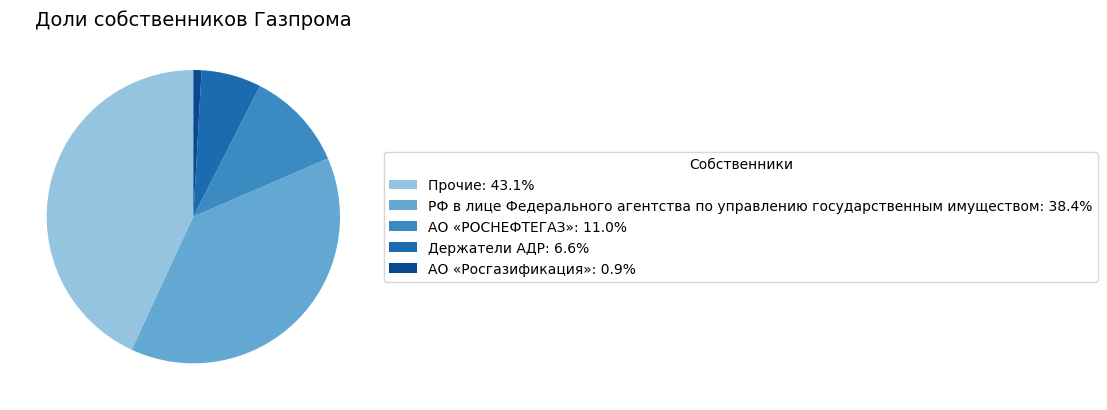

In [15]:
labels = df_own_gazp['owner'].tolist()
sizes = df_own_gazp['own'].tolist()

cmap = cm.get_cmap('Blues')
colors = cmap(np.linspace(0.4, 0.9, len(labels)))

fig, ax = plt.subplots(figsize=(10, 7))

wedges, _ = ax.pie(sizes, startangle=90, colors=colors)

legend_labels = [f"{l}: {s:.1f}%" for l, s in zip(labels, sizes)]
ax.legend(wedges, legend_labels, title="Собственники", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Доли собственников Газпрома", fontsize=14)
ax.set(aspect="equal")
plt.tight_layout()
plt.show()

   Газпром — компания с **доминирующим государственным участием (суммарно \~50%)**, при этом существенная доля **принадлежит прочим инвесторам**.

1. **Крупнейший блок — прочие акционеры**
   На них приходится **43.1%** всех акций.

2. **Государство остаётся основным контролирующим акционером**
   Через Федеральное агентство по управлению госимуществом — **38.4%**.

3. **АО «РОСНЕФТЕГАЗ»** владеет **11.0%**

4. **Иностранные инвесторы (держатели АДР)** — **6.6%**

5. **АО «Росгазификация»** — **0.9%**

### Какая у компании рыночная капитализация? Как она изменилась за последние 5 лет?


- Расчёт `капитализации`: `num * price = рыночная стоимость акций`.

- Фильтрация по марту: выбраны строки, где `month == 3`, тк за 2024 год есть данные только по этому месяцу и 2024 самый ближайший

In [16]:
df_shr_gazp['market_cap'] = df_shr_gazp['num'] * df_shr_gazp['price']
last_5_years = df_shr_gazp[df_shr_gazp.month == 3].sort_values("year").tail(5).loc[::, ["year", "market_cap"]]
last_5_years

,year,market_cap
483,2020,4.290351e+12
487,2021,5.350924e+12
491,2022,5.575822e+12
495,2023,4.022367e+12
499,2024,3.720529e+12


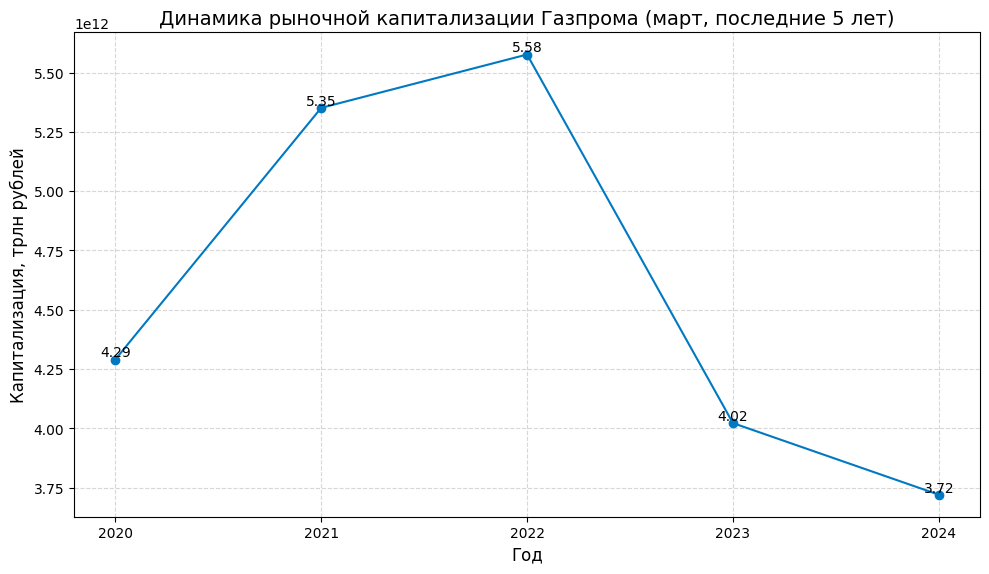

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(last_5_years['year'], last_5_years['market_cap'], marker='o', linestyle='-', color=color)

for x, y in zip(last_5_years['year'], last_5_years['market_cap']):
    plt.text(x, y, f'{y/1e12:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Динамика рыночной капитализации Газпрома (март, последние 5 лет)', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Капитализация, трлн рублей', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(last_5_years['year'])
plt.tight_layout()
plt.show()

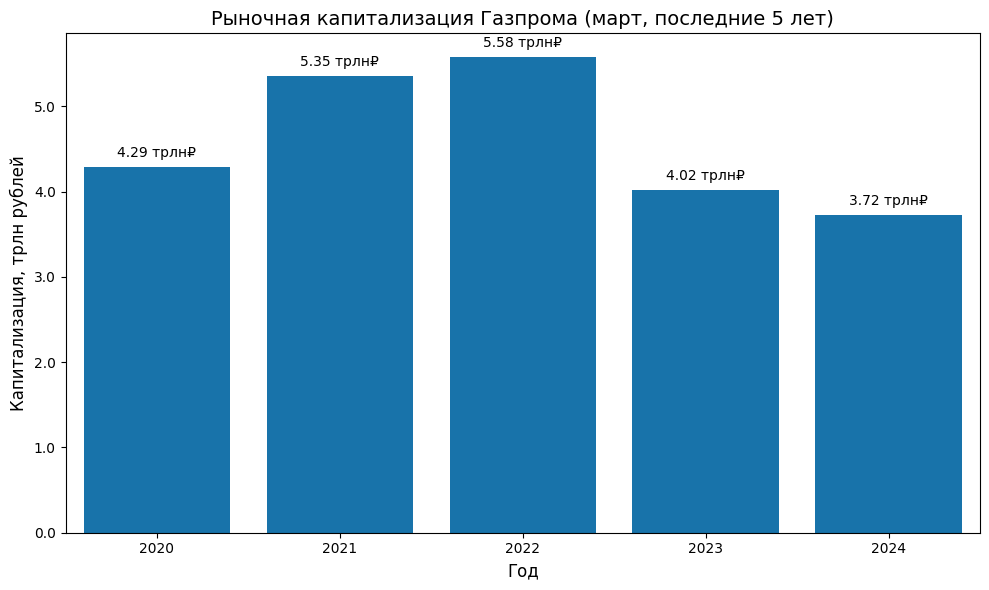

In [18]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=last_5_years, x="year", y="market_cap", color=color)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/1e12:.2f} трлн₽',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, xytext=(0, 5), textcoords='offset points')

ax.set_title('Рыночная капитализация Газпрома (март, последние 5 лет)', fontsize=14)
ax.set_ylabel('Капитализация, трлн рублей', fontsize=12)
ax.set_xlabel('Год', fontsize=12)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e12:.1f}'))

plt.tight_layout()
plt.show()

In [19]:
last_5_years["change_to_prev"] = (last_5_years["market_cap"].pct_change() * 100).round(2)
cap_2024 = last_5_years.loc[last_5_years['year'] == 2024, 'market_cap'].values[0]
last_5_years['change_vs_2024'] = ((cap_2024 - last_5_years['market_cap']) / last_5_years['market_cap']) * 100
last_5_years.loc[last_5_years['year'] == 2024, 'change_vs_2024'] = None
last_5_years.style.map(lambda x: 'color:green' if x > 0 else 'color:red' if x < 0 else 'color:white', subset=['change_to_prev', 'change_vs_2024'])

,year,market_cap,change_to_prev,change_vs_2024
483,2020,4290350742867.000000,nan,-13.281466
487,2021,5350924120787.000000,24.720000,-30.469407
491,2022,5575822493337.000000,4.200000,-33.273893
495,2023,4022366576839.000000,-27.860000,-7.503973
499,2024,3720529287364.000000,-7.500000,nan


На март **2024 года** рыночная капитализация ПАО «Газпром» составила **3.72 трлн рублей**

* В 2020–2022 гг. наблюдался **устойчивый рост** капитализации, с пиком в **2022 году** — **5.58 трлн ₽**.
* С 2022 года началось **снижение**: капитализация упала более чем на **33% за два года**, до 3.72 трлн ₽.

### Какая за последний год выручка у компании? Растет ли она? Какая прибыль? Растет ли прибыль?

In [20]:
df_rev_earn = df_rep_gazp[df_rep_gazp.period == 'Y'][['revenue', 'earnings', 'year']].copy()
df_rev_earn

,revenue,earnings,year
300,4637090.0,1342442,2011
301,4766495.0,1252415,2012
302,5249965.0,1165705,2013
303,5589811.0,157192,2014
304,6073318.0,805199,2015
305,6111051.0,997104,2016
306,6546143.0,766879,2017
314,8224177.0,1528996,2018
322,7659623.0,1269517,2019
330,6321559.0,162407,2020


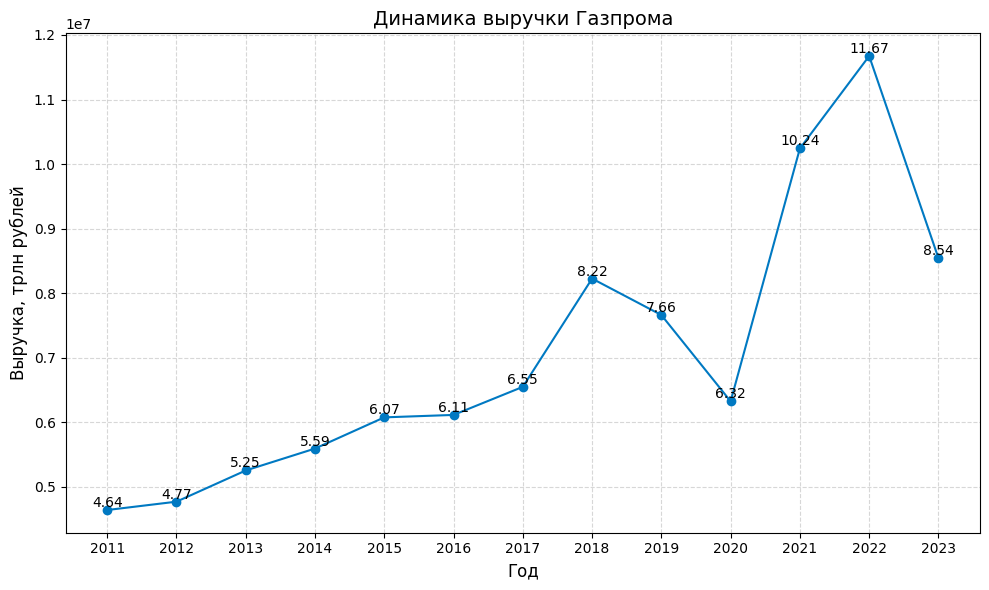

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(df_rev_earn['year'], df_rev_earn['revenue'], marker= 'o', linestyle = '-', color=color)
for x, y in zip(df_rev_earn['year'], df_rev_earn['revenue']):
  plt.text(x, y, f'{y/1e6:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Динамика выручки Газпрома', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Выручка, трлн рублей', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(df_rev_earn['year'])
plt.tight_layout()
plt.show()

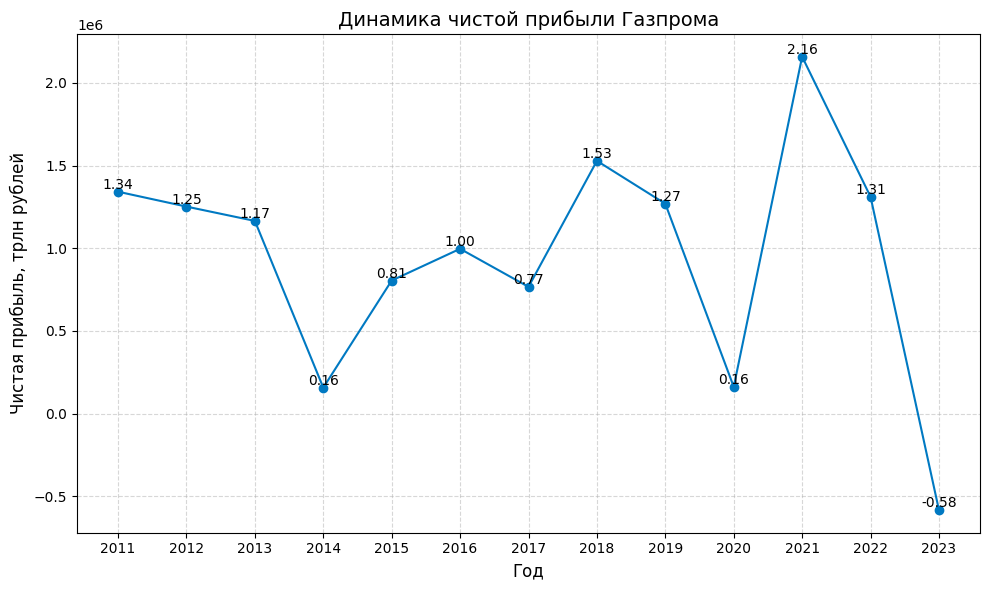

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(df_rev_earn['year'], df_rev_earn['earnings'], marker= 'o', linestyle = '-', color=color)
for x, y in zip(df_rev_earn['year'], df_rev_earn['earnings']):
  plt.text(x, y, f'{y/1e6:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Динамика чистой прибыли Газпрома', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Чистая прибыль, трлн рублей', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(df_rev_earn['year'])
plt.tight_layout()
plt.show()

In [23]:
df_rev_earn['change_to_prev_rev'] = (df_rev_earn.revenue.pct_change() * 100).round(2)
df_rev_earn['change_to_prev_ear'] = (df_rev_earn.earnings.pct_change() * 100).round(2)

df_rev_earn.style.map(lambda x: 'color:green' if x > 0 else 'color:red' if x<0 else 'color:white', subset = ['change_to_prev_rev', 'change_to_prev_ear'])

,revenue,earnings,year,change_to_prev_rev,change_to_prev_ear
300,4637090.000000,1342442,2011,nan,nan
301,4766495.000000,1252415,2012,2.790000,-6.710000
302,5249965.000000,1165705,2013,10.140000,-6.920000
303,5589811.000000,157192,2014,6.470000,-86.520000
304,6073318.000000,805199,2015,8.650000,412.240000
305,6111051.000000,997104,2016,0.620000,23.830000
306,6546143.000000,766879,2017,7.120000,-23.090000
314,8224177.000000,1528996,2018,25.630000,99.380000
322,7659623.000000,1269517,2019,-6.860000,-16.970000
330,6321559.000000,162407,2020,-17.470000,-87.210000


* **Выручка в 2023 году**: **8 541 818 млн рублей** (≈ 8.54 трлн ₽)

* Выручка **сократилась на 26.83%** по сравнению с 2022 годом.
  Это **наиболее резкое падение за последние 10 лет**, кроме 2020 года.

* **Чистая прибыль в 2023 году**: **−583 076 млн рублей** (то есть **убыток 583 млрд ₽**)

* Прибыль упала с **1.3 трлн ₽ в 2022 году** до **отрицательной величины** в 2023.
* Снижение составило **−144.45%**, что означает переход из прибыли в **чистый убыток**.

### Какая у компании выручка и прибыль на 1 акцию? Как менялся этот показатель?

In [24]:
df_per_shr = df_rev_earn[['revenue', 'earnings', 'year']].merge(df_shr_gazp[df_shr_gazp.month == 3][['num', 'year']], how = 'inner', on = 'year')
df_per_shr['num'] /= 1e6

In [25]:
df_per_shr['ear_per_shr'] = df_per_shr['earnings'] / df_per_shr['num']
df_per_shr['rev_per_shr'] = df_per_shr['revenue'] / df_per_shr['num']
df_per_shr

,revenue,earnings,year,num,ear_per_shr,rev_per_shr
0,4766495.0,1252415,2012,23673.5129,52.903640,201.342953
1,5249965.0,1165705,2013,23673.5129,49.240897,221.765355
2,5589811.0,157192,2014,23673.5129,6.639995,236.120893
3,6073318.0,805199,2015,23673.5129,34.012654,256.544858
4,6111051.0,997104,2016,23673.5129,42.118971,258.138749
5,6546143.0,766879,2017,23673.5129,32.393967,276.517601
6,8224177.0,1528996,2018,23673.5129,64.586781,347.399942
7,7659623.0,1269517,2019,23673.5129,53.626051,323.552446
8,6321559.0,162407,2020,23673.5129,6.860283,267.030881
9,10241353.0,2159086,2021,23673.5129,91.202603,432.608082


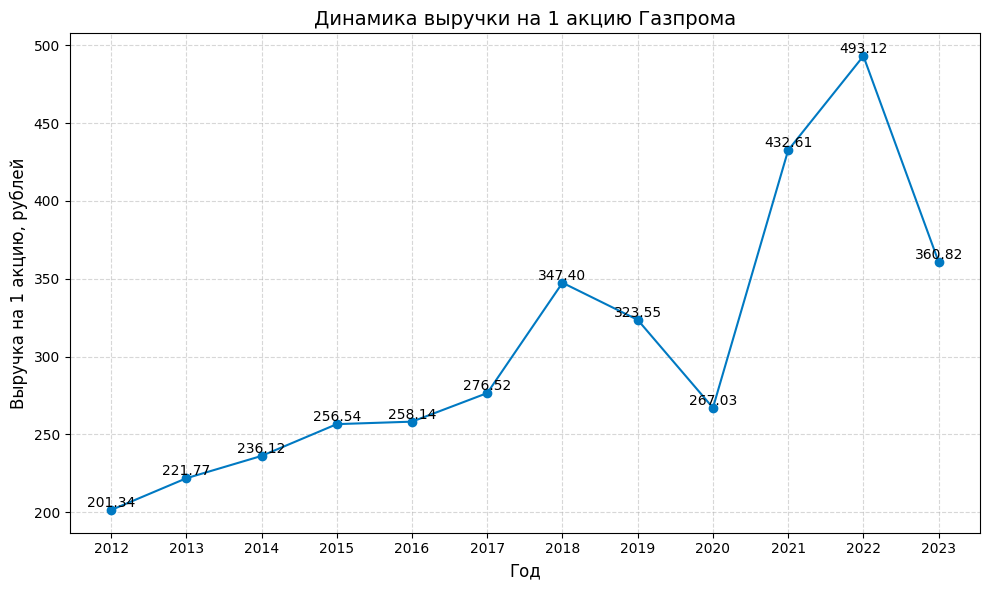

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(df_per_shr['year'], df_per_shr['rev_per_shr'], marker= 'o', linestyle = '-', color=color)
for x, y in zip(df_per_shr['year'], df_per_shr['rev_per_shr']):
  plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Динамика выручки на 1 акцию Газпрома', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Выручка на 1 акцию, рублей', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(df_per_shr['year'])
plt.tight_layout()
plt.show()

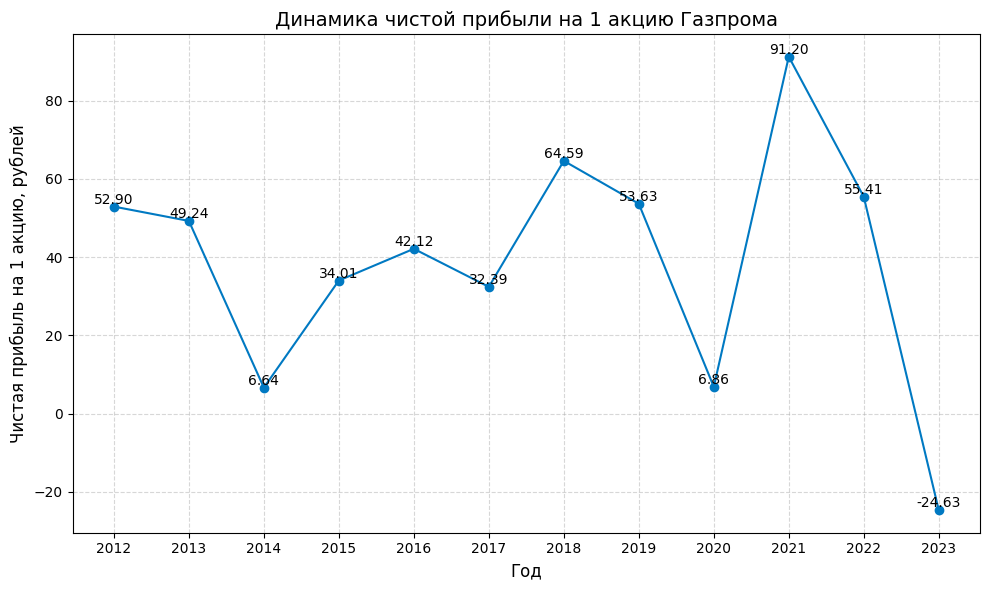

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(df_per_shr['year'], df_per_shr['ear_per_shr'], marker= 'o', linestyle = '-', color=color)
for x, y in zip(df_per_shr['year'], df_per_shr['ear_per_shr']):
  plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Динамика чистой прибыли на 1 акцию Газпрома', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Чистая прибыль на 1 акцию, рублей', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(df_per_shr['year'])
plt.tight_layout()
plt.show()

In [28]:
df_per_shr['ear_per_shr_change'] = (df_per_shr.ear_per_shr.pct_change() * 100).round(2)
df_per_shr['rev_per_shr_change'] = (df_per_shr.rev_per_shr.pct_change() * 100).round(2)
df_per_shr.style.map(lambda x: 'color:green' if x > 0 else 'color:red' if x<0 else 'color:white', subset = ['ear_per_shr_change', 'rev_per_shr_change'])

,revenue,earnings,year,num,ear_per_shr,rev_per_shr,ear_per_shr_change,rev_per_shr_change
0,4766495.000000,1252415,2012,23673.512900,52.903640,201.342953,nan,nan
1,5249965.000000,1165705,2013,23673.512900,49.240897,221.765355,-6.920000,10.140000
2,5589811.000000,157192,2014,23673.512900,6.639995,236.120893,-86.520000,6.470000
3,6073318.000000,805199,2015,23673.512900,34.012654,256.544858,412.240000,8.650000
4,6111051.000000,997104,2016,23673.512900,42.118971,258.138749,23.830000,0.620000
5,6546143.000000,766879,2017,23673.512900,32.393967,276.517601,-23.090000,7.120000
6,8224177.000000,1528996,2018,23673.512900,64.586781,347.399942,99.380000,25.630000
7,7659623.000000,1269517,2019,23673.512900,53.626051,323.552446,-16.970000,-6.860000
8,6321559.000000,162407,2020,23673.512900,6.860283,267.030881,-87.210000,-17.470000
9,10241353.000000,2159086,2021,23673.512900,91.202603,432.608082,1229.430000,62.010000


| Показатель                 | Значение     |
| -------------------------- | ------------ |
| **Выручка на акцию**       | **360.82 ₽** |
| **Прибыль на акцию (EPS)** | **–24.63 ₽** |

* В 2023 году компания **получила убыток на каждую акцию**, несмотря на относительно высокую выручку.

---

#### **Прибыль на акцию (`ear_per_shr`)**

* Резко **упала** в 2014 (6.6 ₽) и 2020 (6.86 ₽),
* Максимум — в 2021 году: **91.2 ₽**,
* В 2023 — **отрицательное значение**: **–24.63 ₽**, что означает **убыток на акцию**.

#### **Выручка на акцию (`rev_per_shr`)**

* **Плавно росла** с 2012 по 2022: с **201 ₽** до **493 ₽**,
* В 2023 снизилась до **360.8 ₽**.



### Сколько активов и сколько обязательств у компании? Что растет быстрее?

In [29]:
df_as_lia = df_rep_gazp[df_rep_gazp.period == 'Y'][['total_assets', 'total_liabilities', 'period', 'year']]
df_as_lia

,total_assets,total_liabilities,period,year
300,10900696.0,3139705.0,Y,2011
301,11956836.0,3476891.0,Y,2012
302,13436236.0,3801882.0,Y,2013
303,15177470.0,5057449.0,Y,2014
304,17052040.0,6137418.0,Y,2015
305,16918938.0,5477099.0,Y,2016
306,18238770.0,6223289.0,Y,2017
314,20810440.0,7034287.0,Y,2018
322,21882348.0,7266661.0,Y,2019
330,23352185.0,8547453.0,Y,2020


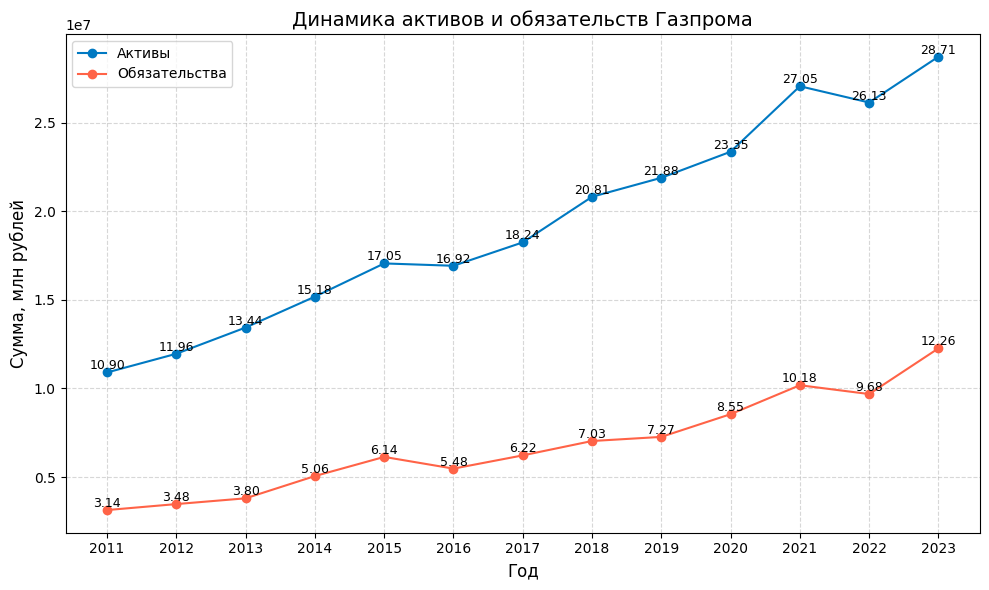

In [30]:
plt.figure(figsize=(10, 6))

plt.plot(df_as_lia['year'], df_as_lia['total_assets'], marker='o', linestyle='-', color=color, label='Активы')
for x, y in zip(df_as_lia['year'], df_as_lia['total_assets']):
    plt.text(x, y, f'{y/1e6:.2f}', ha='center', va='bottom', fontsize=9)

plt.plot(df_as_lia['year'], df_as_lia['total_liabilities'], marker='o', linestyle='-', color='tomato', label='Обязательства')
for x, y in zip(df_as_lia['year'], df_as_lia['total_liabilities']):
    plt.text(x, y, f'{y/1e6:.2f}', ha='center', va='bottom', fontsize=9)

plt.title('Динамика активов и обязательств Газпрома', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Сумма, млн рублей', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(df_as_lia['year'])
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
df_as_lia['assets_change'] = (df_as_lia.total_assets.pct_change() * 100).round(2)
df_as_lia['liabilities_change'] = (df_as_lia.total_liabilities.pct_change() * 100).round(2)
df_as_lia.style.map(lambda x: 'color:green' if x > 0 else 'color:red' if x<0 else 'color:white', subset = ['assets_change', 'liabilities_change'])

,total_assets,total_liabilities,period,year,assets_change,liabilities_change
300,10900696.000000,3139705.000000,Y,2011,nan,nan
301,11956836.000000,3476891.000000,Y,2012,9.690000,10.740000
302,13436236.000000,3801882.000000,Y,2013,12.370000,9.350000
303,15177470.000000,5057449.000000,Y,2014,12.960000,33.020000
304,17052040.000000,6137418.000000,Y,2015,12.350000,21.350000
305,16918938.000000,5477099.000000,Y,2016,-0.780000,-10.760000
306,18238770.000000,6223289.000000,Y,2017,7.800000,13.620000
314,20810440.000000,7034287.000000,Y,2018,14.100000,13.030000
322,21882348.000000,7266661.000000,Y,2019,5.150000,3.300000
330,23352185.000000,8547453.000000,Y,2020,6.720000,17.630000


| Показатель        | Значение (млн ₽) |
| ----------------- | ---------------- |
| **Активы**        | **28 713 748**   |
| **Обязательства** | **12 261 034**   |

---

Если сравнить **динамику роста с 2011 по 2023**:

#### Активы:

* В 2011: 10 900 696 млн ₽
* В 2023: 28 713 748 млн ₽
* **Рост**:

  $$
  \frac{28.7 - 10.9}{10.9} \approx \underline{+163\%}
  $$

#### Обязательства:

* В 2011: 3 139 705 млн ₽
* В 2023: 12 261 034 млн ₽
* **Рост**:

  $$
  \frac{12.26 - 3.14}{3.14} \approx \underline{+291\%}
  $$